In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('/content/Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# drop customerID
df.drop('customerID',axis=1,inplace=True)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
# seprate data into category and numeric
cat_data=df.select_dtypes(include='object')
num_data=df.select_dtypes(include=['float','int'])

In [9]:
cat_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [10]:
num_data

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70
...,...,...,...
7038,0,24,84.80
7039,0,72,103.20
7040,0,11,29.60
7041,1,4,74.40


In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in cat_data:
  le=LabelEncoder()
  cat_data[col]=le.fit_transform(cat_data[col])

In [12]:
cat_data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1


In [13]:
num_data.head()

,SeniorCitizen,tenure,MonthlyCharges
0,0,1,29.85
1,0,34,56.95
2,0,2,53.85
3,0,45,42.30
4,0,2,70.70


In [14]:
data=pd.concat([cat_data,num_data],axis=1)

In [15]:
data.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0,0,1,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0,0,34,56.95
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,1,0,2,53.85
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0,0,45,42.30
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,1,0,2,70.70


In [16]:
x = data.drop(['Churn'],axis=1)

In [17]:
x

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,SeniorCitizen,tenure,MonthlyCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,2505,0,1,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,1466,0,34,56.95
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,157,0,2,53.85
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,1400,0,45,42.30
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,925,0,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,1597,0,24,84.80
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,5698,0,72,103.20
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,2994,0,11,29.60
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,2660,1,4,74.40


In [18]:
y=data['Churn']

In [19]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [20]:
#spliting dataset into train_test_split
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
#performing feature scaling
from sklearn.preprocessing import StandardScaler

In [23]:
#instance
sc=StandardScaler()

In [24]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [25]:
#initialising ANN
ann=tf.keras.models.Sequential()

#adding first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

#compiling ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = ann.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
177/177 [==============================] - 3s 7ms/step - loss: 0.6197 - accuracy: 0.7116 - val_loss: 0.4945 - val_accuracy: 0.7530
Epoch 2/200
177/177 [==============================] - 1s 3ms/step - loss: 0.5009 - accuracy: 0.7355 - val_loss: 0.4532 - val_accuracy: 0.7700
Epoch 3/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4757 - accuracy: 0.7528 - val_loss: 0.4385 - val_accuracy: 0.7828
Epoch 4/200
177/177 [==============================] - 1s 3ms/step - loss: 0.4638 - accuracy: 0.7606 - val_loss: 0.4313 - val_accuracy: 0.7935
Epoch 5/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4558 - accuracy: 0.7664 - val_loss: 0.4251 - val_accuracy: 0.7984
Epoch 6/200
177/177 [==============================] - 1s 6ms/step - loss: 0.4492 - accuracy: 0.7716 - val_loss: 0.4232 - val_accuracy: 0.7949
Epoch 7/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4444 - accuracy: 0.7749 - val_loss: 0.4191 - val_accuracy: 0.7906

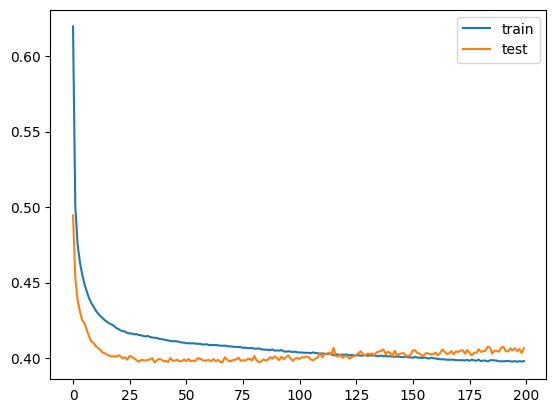

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## Applying Dropout layer

In [28]:
#initialising ANN
ann1=tf.keras.models.Sequential()

# Adding a dropout layer to prevent overfitting
ann1.add(tf.keras.layers.Dropout(0.2))

#adding first hidden layer
ann1.add(tf.keras.layers.Dense(units=8,activation='relu'))

ann1.add(tf.keras.layers.Dropout(0.2))
#adding second hidden layer
ann1.add(tf.keras.layers.Dense(units=6,activation='relu'))

#adding output layer
ann1.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [29]:
#compiling ANN
ann1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = ann1.fit(x_train,y_train,batch_size=32,epochs=200,validation_data=(x_test,y_test))

Epoch 1/200
177/177 [==============================] - 2s 4ms/step - loss: 0.7470 - accuracy: 0.5023 - val_loss: 0.5947 - val_accuracy: 0.7275
Epoch 2/200
177/177 [==============================] - 1s 4ms/step - loss: 0.5843 - accuracy: 0.7070 - val_loss: 0.5038 - val_accuracy: 0.7509
Epoch 3/200
177/177 [==============================] - 1s 3ms/step - loss: 0.5304 - accuracy: 0.7307 - val_loss: 0.4628 - val_accuracy: 0.7523
Epoch 4/200
177/177 [==============================] - 1s 3ms/step - loss: 0.5026 - accuracy: 0.7377 - val_loss: 0.4433 - val_accuracy: 0.7559
Epoch 5/200
177/177 [==============================] - 1s 4ms/step - loss: 0.4859 - accuracy: 0.7442 - val_loss: 0.4322 - val_accuracy: 0.7551
Epoch 6/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4863 - accuracy: 0.7481 - val_loss: 0.4273 - val_accuracy: 0.7651
Epoch 7/200
177/177 [==============================] - 1s 5ms/step - loss: 0.4793 - accuracy: 0.7520 - val_loss: 0.4222 - val_accuracy: 0.7793

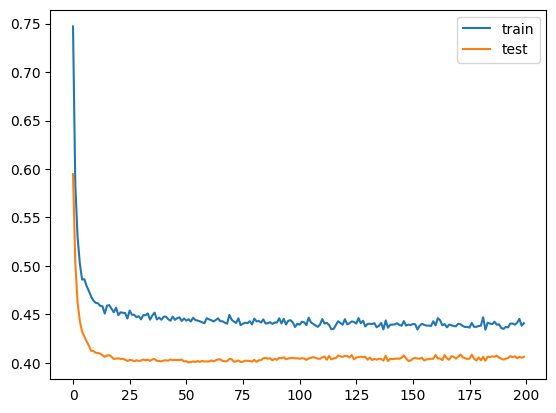

In [31]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()